#### Dataset

In [2]:
# Dataset: Petrol_Consumption.csv
# Location: https://mitu.co.in/dataset

#### Import the necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Import the dataset

In [7]:
df = pd.read_csv('petrol_consumption.csv')

In [9]:
df.shape

(48, 5)

In [11]:
df.corrwith(df['Petrol_Consumption'])

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
dtype: float64

#### Separate the input and output data

In [14]:
# input data
x = df.drop('Petrol_Consumption', axis = 1)

# output data
y = df['Petrol_Consumption']

#### Cross-validation

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [19]:
x_train.shape

(36, 4)

In [20]:
x_test.shape

(12, 4)

#### Build the model

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(random_state=0)

In [24]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Prediction on unseen data

In [26]:
y_pred = regressor.predict(x_test)

In [27]:
y_pred

array([541., 498., 628., 628., 628., 644., 628., 649., 414., 464., 414.,
       628.])

In [28]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [29]:
result

,Actual,Predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


#### Performance Evaluation

In [33]:
# mean absolute error
np.mean(abs(y_test - y_pred))

68.08333333333333

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred) * 100

12.94003614849453

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
np.mean((y_test - y_pred)**2)

5713.25

In [39]:
mean_squared_error(y_test, y_pred)

5713.25

In [40]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

75.58604368532593

#### Prediction on unseen data

In [42]:
new = [[8.00, 4983, 602, 0.6020]]

In [43]:
regressor.predict(new)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([540.])

#### Visualize the tree

In [45]:
from sklearn.tree import plot_tree

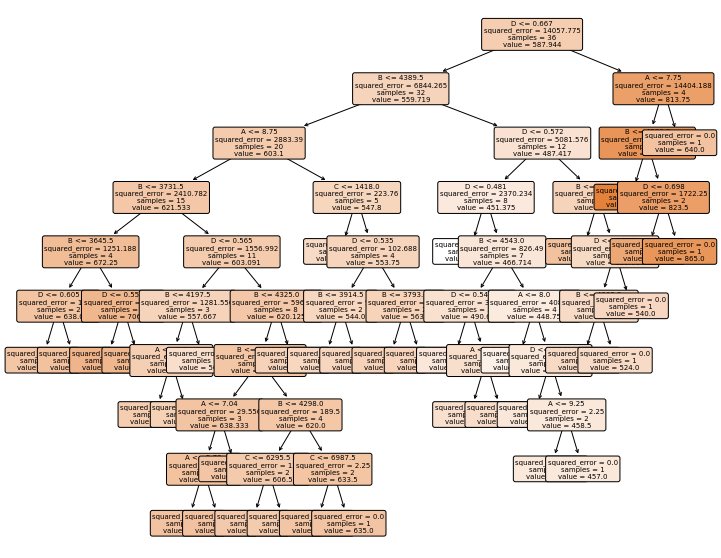

In [47]:
plt.figure(figsize=(12,10))
plot_tree(regressor, fontsize=7, filled=True, rounded=True,
         feature_names=['A','B','C','D']);